### TPC Benchmarking  
Results Plotting  

In [13]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 1.0})

import config

In [14]:
test = "TPC-H"
scale_factor = "100"

In [15]:
fps = config.fp_results + config.sep + "tpc-h_single_queries"
fps

'/home/colin/code/bq_snowflake_benchmark/results/tpc-h_single_queries'

In [16]:
fps_results = glob.glob(fps + "/*_*_results*")

In [17]:
fps_time = glob.glob(fps + "/*_*_times*")

In [18]:
d = []
for fp in fps_time:
    df = pd.read_csv(fp, index_col=None, header=0)
    d.append(df)

df = pd.concat(d, axis=0, ignore_index=True)

In [27]:
fps[0]

'/'

In [28]:
if "query" in fps_time[0]:
    x_type = "query_n"
else:
    x_type = "stream_p"

In [29]:
df.head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost,description
0,bq,h,1,h_1GB_qual,5_query_test,5,2020-05-05 05:33:07.557000+00:00,2020-05-05 05:33:09.660000+00:00,230599591,230686720.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_5_query_test
24,sf,h,1,h_1GB_qual,22_query_test,22,2020-05-04 23:02:39.233505,2020-05-04 23:02:40.541613,-1,NaN,NaN,0.00073254,sf_22_query_test
25,sf,h,1,h_1GB_qual,9_query_test,9,2020-05-04 22:35:47.733515,2020-05-04 22:35:49.474829,-1,NaN,NaN,0 days 00:00:00.000975135,sf_9_query_test
26,sf,h,1,h_1GB_qual,4_query_test,4,2020-05-04 22:32:57.088020,2020-05-04 22:32:57.843877,-1,NaN,NaN,0 days 00:00:00.000423279,sf_4_query_test
27,bq,h,1,h_1GB_qual,2_query_test,2,2020-05-05 05:32:13.064000+00:00,2020-05-05 05:32:14.562000+00:00,31646123,52428800.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_2_query_test


In [30]:
df = df.sort_values(by="bq_dataset")

In [31]:
df["description"] = df.db + "_" + df.desc

In [36]:
df.t0 = pd.to_datetime(df.t0)
df.t1 = pd.to_datetime(df.t1)

df["dt"] = df.t1 - df.t0
df["dt_s"] = df.dt.dt.total_seconds()

In [37]:
df[df.db == "sf"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost,description,dt,dt_s
2,sf,h,1,h_1GB_qual,11_query_test,11,2020-05-04 22:37:18.167193,2020-05-04 22:37:19.293976,-1,NaN,NaN,0 days 00:00:00.000630998,sf_11_query_test,00:00:01.126783,1.126783
3,sf,h,1,h_1GB_qual,12_query_test,12,2020-05-04 23:19:54.268891,2020-05-04 23:19:55.338336,-1,NaN,NaN,0.000598889,sf_12_query_test,00:00:01.069445,1.069445
5,sf,h,1,h_1GB_qual,2_query_test,2,2020-05-04 22:32:16.730582,2020-05-04 22:32:19.244290,-1,NaN,NaN,0 days 00:00:00.001407676,sf_2_query_test,00:00:02.513708,2.513708
7,sf,h,1,h_1GB_qual,19_query_test,19,2020-05-04 22:59:21.977675,2020-05-04 22:59:23.514955,-1,NaN,NaN,0.000860877,sf_19_query_test,00:00:01.537280,1.537280
8,sf,h,1,h_1GB_qual,5_query_test,5,2020-05-04 22:33:11.345287,2020-05-04 22:33:12.565355,-1,NaN,NaN,0 days 00:00:00.000683238,sf_5_query_test,00:00:01.220068,1.220068


In [38]:
df[df.db == "bq"].head()

,db,test,scale,bq_dataset,desc,query_n,t0,t1,bytes_processed,bytes_billed,query_plan,cost,description,dt,dt_s
0,bq,h,1,h_1GB_qual,5_query_test,5,2020-05-05 05:33:07.557000+00:00,2020-05-05 05:33:09.660000+00:00,230599591,230686720.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_5_query_test,00:00:02.103000,2.103
4,bq,h,1,h_1GB_qual,10_query_test,10,2020-05-05 05:36:37.404000+00:00,2020-05-05 05:36:40.336000+00:00,222417387,223346688.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_10_query_test,00:00:02.932000,2.932
6,bq,h,1,h_1GB_qual,14_query_test,14,2020-05-05 05:39:46.499000+00:00,2020-05-05 05:39:47.564000+00:00,198158826,198180864.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_14_query_test,00:00:01.065000,1.065
9,bq,h,1,h_1GB_qual,6_query_test,6,2020-05-05 05:33:18.877000+00:00,2020-05-05 05:33:19.813000+00:00,192038880,192937984.0,"{0: {'_properties': {'name': 'S00: Input', 'id...",NaN,bq_6_query_test,00:00:00.936000,0.936
10,bq,h,1,h_1GB_qual,15_query_test,15,2020-05-05 05:55:40.977000+00:00,2020-05-05 05:55:44.123000+00:00,192758651,192937984.0,{},NaN,bq_15_query_test,00:00:03.146000,3.146


In [49]:
dfp_dt = df.pivot(index=x_type, columns="db", values="dt_s")
dfp_bp = df.pivot(index=x_type, columns="db", values="bytes_processed")

In [50]:
def bytes_to_TebiByte(b):
    return b / 1099511627776

In [51]:
dfp_bp = dfp_bp.apply(bytes_to_TebiByte)

### Plot Results

In [52]:
sns.set_style("darkgrid", {"xtick.bottom":True})

In [53]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
set2 = sns.color_palette("Set2", 8)
hls = sns.hls_palette(n_colors=12)

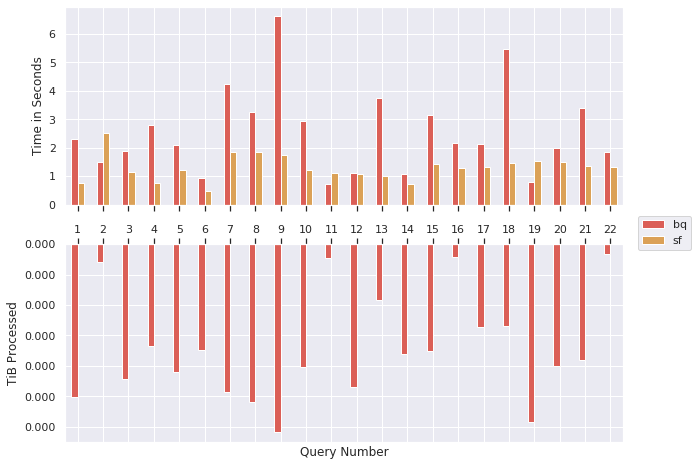

In [54]:
plot_name = "{}_{}GB_{}_comparison.png".format(test, scale_factor, x_type)

# invert bytes processed for plotting
_dfp_bp = dfp_bp.copy() * -1
color_palette = hls
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1 = dfp_dt.plot.bar(ax=ax1, legend=False, color=color_palette)
ax2 = _dfp_bp.plot.bar(ax=ax2, legend=False, color=color_palette);

# set the figure size BEFORE adjusting ticks
fig.set_size_inches(10, 8, forward=True)

handles, labels = ax1.get_legend_handles_labels()

ax1.set_ylabel("Time in Seconds")
ax1.set_xlabel(None)
ax1_xticklabels = ax1.get_xticklabels()
ax1.set_xticklabels(labels=[])

ax2.set_ylabel("TiB Processed")
ax2.set_xlabel("Query Number")
ticks =  ax2.get_yticks()
ticks = ["{:01.3f}".format(abs(tick)) for tick in ticks]
ax2.set_yticklabels(ticks);
ax2.xaxis.tick_top()

#plt.subplots_adjust(hspace=0.11)
#plt.subplots_adjust(right=0.79)

fig.legend(handles, labels, loc="right")
#fig.legend(handles, labels, loc="lower center")
plt.savefig(config.fp_plots + config.sep + plot_name, bbox_to_anchor='tight')
print();

In [55]:
dfp_dt.sum()

db
bq    56.206000
sf    28.677865
dtype: float64

In [ ]:
dfp_bp.sum()

In [ ]:
dfp_bp.sum() * 5